# Import and Install:

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models
from torch.utils.data.sampler import SubsetRandomSampler
from numpy.lib.function_base import append
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from transformers import ConvNextFeatureExtractor, ConvNextForImageClassification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Raw Data and Visualization:

In [ ]:
PATH_OF_DATA= './drive/MyDrive/MLProject/Generalization_Images'
!ls {PATH_OF_DATA}

Cat  Dog  Horse  Ship


In [ ]:
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([
                    transforms.CenterCrop(224),
                    transforms.ToTensor()])
# Comment 1 : Load the datasets with ImageFolder
image_datasets = torchvision.datasets.ImageFolder(root= "./drive/MyDrive/MLProject/Generalization_Images", transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloadersTest = torch.utils.data.DataLoader(image_datasets, batch_size=32, shuffle=True, num_workers=2)

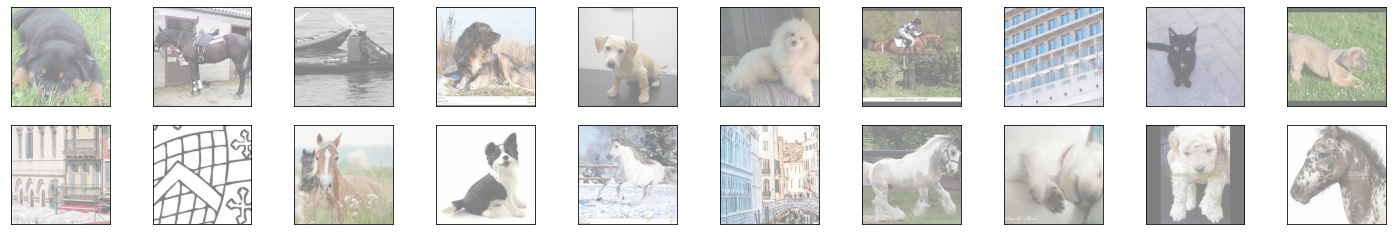

In [ ]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
    
dataiter = iter(dataloadersTest)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [ ]:
# Cat = 0, Dog = 1, Horse = 2, Ship = 3
labels

tensor([1, 2, 3, 1, 1, 1, 2, 3, 0, 1, 3, 3, 2, 1, 2, 3, 2, 1, 1, 2, 0, 2, 1, 3,
        0, 1, 1, 1, 1, 2, 1, 2])

# Transform:

In [ ]:
train_mean = torch.load('./drive/MyDrive/MLProject/normalizer_mean.pt')
train_std = torch.load('./drive/MyDrive/MLProject/normalizer_std.pt')

In [ ]:

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_mean, std=train_std)
])

# Feature Extraction:

In [ ]:
image_datasets = torchvision.datasets.ImageFolder(root= "./drive/MyDrive/MLProject/Generalization_Images", transform=test_transform)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloader = torch.utils.data.DataLoader(image_datasets, batch_size=1, shuffle=True, num_workers=2)

In [ ]:
# torch.save(dataloader, 'Generalization_data.pt')

In [ ]:
len(dataloader)

10546

In [ ]:
# Use CUDA/GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = torch.load("Model_ConvNeXt_97")
batch_size = 1

for param in model.parameters():
    param.requires_grad = False

model.eval()

new_classifier = nn.Sequential(*list(model.classifier.children())[:-1])
model.classifier = new_classifier

model.to(device)

# Saving Extracted Features - Tabular Modeling
def extract_save(data_loader, dataset, batch_size=1):
    x = []
    y = []
    counter = 0
    with torch.no_grad():
        for i, data in data_loader:
            images, labels = data[0].to(device), data[1].to(device)
            y.append(labels)
            x.append(model(images))
            if i % 100 == 0:
              print(i)
    
    features = []
    for index, item in enumerate(x):
        features.append(item.logits)

    x = features
    x = torch.stack(x)
    y = torch.stack(y)

    x_size = x.size()
    x = x.cpu()
    x = x.numpy()   
    x = x.T.reshape(x_size[2],x_size[0]*batch_size)
    x = x.T

    y_size = y.size()
    y = y.cpu()
    y = y.numpy()
    y = y.T.reshape(1,y_size[0]*batch_size)
    y = y.flatten()
    
    torch.save(x, f'./{dataset}_extracted_features.pt')
    torch.save(y, f'./{dataset}_extracted_labels.pt')
    print(f'---extracted {dataset} saved---')

extract_save(dataloader, 'gen', batch_size=batch_size)

Streaming output truncated to the last 5000 lines.
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737